In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statistics import mean, variance, pvariance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

In [17]:
data = pd.read_csv("processedsmartphoneinfo.csv", sep = ";")
data = data.sample(frac=1).reset_index(drop=True)

traindata = data[:-51]
testdata = data[230:]

Xtrain = traindata.drop('price', axis = 1)
ytrain = traindata[['price']]

Xtest = testdata.drop('price', axis = 1)
ytest = testdata[['price']]

In [18]:
bag = BaggingRegressor(DecisionTreeRegressor(max_depth=10), n_estimators = 75)
bag.fit(Xtrain, ytrain.values.ravel())
ypredict = bag.predict(Xtest)
mean_absolute_error(ytest.values.ravel(), ypredict)

0.6613595497341009

[-0.10185950864755, 0.18521333333332635, -0.04770158730158647, 0.9073333333333267, -0.36025196729196685, 1.7054920634920556, 0.2748205146734497, -0.22730014652014896, 4.484666666666659, -0.42835214376938957, -0.2635467452807667, 0.6586666666666616, 2.929648092352089, -2.4864622222222295, 0.11795147744403289, -0.06674666666666629, -0.27141188959993556, 0.5281935449735453, -0.39458875816993544, -0.8106073015873045, -0.00957333333334276, -0.4769869637004813, 0.3580104697771329, 1.283555555555548, -0.022046383990335983, -0.5708764398644846, 0.2899187301587265, -2.344316129549467, -0.2155785054945074, 0.07212625836908115, 0.1549264444444418, 0.07363144332209792, 0.04209579975580091, 0.6245399598243937, 0.03782666666666756, -0.821555555555566, -0.12263619047619034, -0.1293736703296715, -0.03755555555556356, 0.033599999999998964, -0.5480000000000054, 0.14615206349206522, -0.27025954882155023, 0.9170558459423983, -0.5817016296296273, 0.08502142319554107, -0.38985999999999965, -0.05343597883597

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


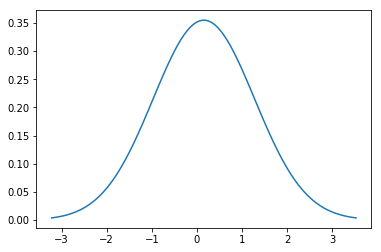

0.15310132141275754
1.2652047197601082


In [20]:
err = []
for idx in range(len(ytest.values.ravel())):
    err.append(ytest.values.ravel()[idx]-ypredict[idx])
print (err)
mu = mean(err) #mean_absolute_error(flattentest, ypredict)
var = variance(err) #mean_squared_error(flattentest, ypredict)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print (mu)
print (var)